In [11]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

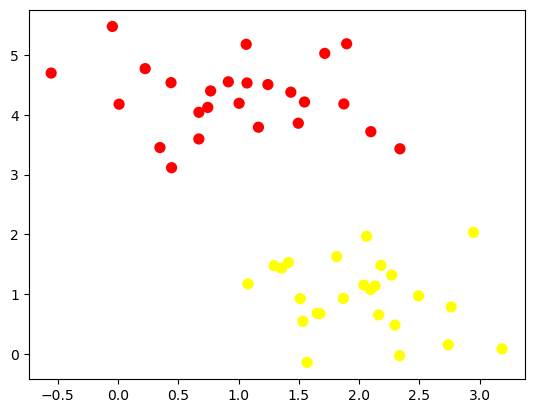

In [12]:
X, y = make_blobs(n_samples=50, centers=2,  # Membuat dataset dengan 50 sampel dan 2 pusat cluster
                  random_state=0, cluster_std=0.60)  # Mengatur seed random_state untuk hasil yang dapat direproduksi dan standar deviasi cluster sebesar 0.60
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat plot scatter dari data yang dihasilkan, dengan warna berdasarkan label cluster dan menggunakan colormap 'autumn'

(-1.0, 3.5)

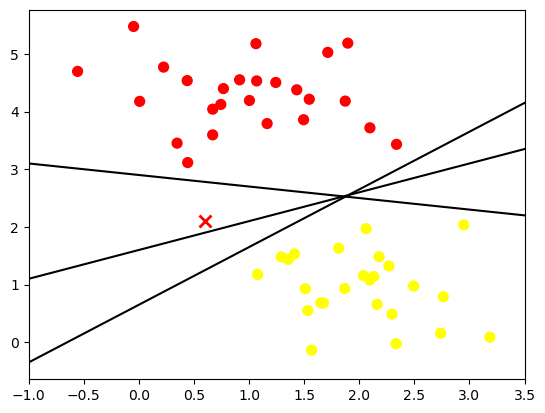

In [16]:
xfit = np.linspace(-1, 3.5)  # Membuat array xfit yang berisi 50 nilai yang terdistribusi secara merata dari -1 hingga 3.5
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat plot scatter dari data yang dihasilkan, dengan warna berdasarkan label cluster dan menggunakan colormap 'autumn'
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=9)  # Menambahkan tanda 'x' merah pada titik (0.6, 2.1) dengan lebar tepi dan ukuran tertentu

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:  # Loop melalui pasangan nilai m dan b untuk menggambar beberapa garis
    plt.plot(xfit, m * xfit + b, '-k')  # Menggambar garis dengan kemiringan m dan intercept b pada xfit, dengan warna hitam

plt.xlim(-1, 3.5)  # Mengatur batas sumbu x dari -1 hingga 3.5


(-1.0, 3.5)

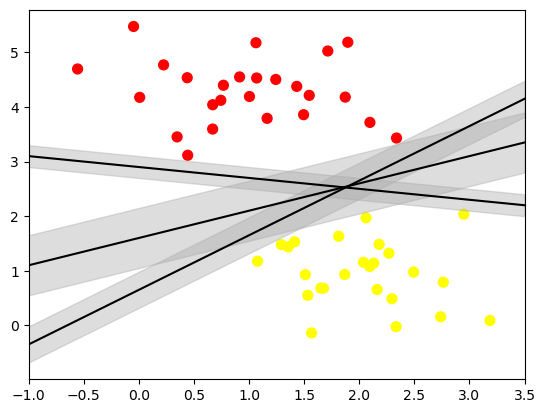

In [42]:
xfit = np.linspace(-1, 3.5)  # Membuat array xfit yang berisi nilai yang terdistribusi secara merata dari -1 hingga 3.5
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat plot scatter dari data yang dihasilkan, dengan warna berdasarkan label cluster dan menggunakan colormap 'autumn'

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:  # Loop melalui pasangan nilai m, b, dan d untuk menggambar beberapa garis dengan area ketidakpastian
    yfit = m * xfit + b  # Menghitung nilai yfit berdasarkan kemiringan m dan intercept b
    plt.plot(xfit, yfit, '-k')  # Menggambar garis dengan kemiringan m dan intercept b pada xfit, dengan warna hitam
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',  # Mengisi area antara yfit - d dan yfit + d dengan warna abu-abu dan transparansi 0.4
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)  # Mengatur batas sumbu x dari -1 hingga 3.5


In [18]:
from sklearn.svm import SVC  # Mengimpor kelas SVC (Support Vector Classifier) dari modul sklearn.svm
model = SVC(kernel='linear', C=1E10)  # Membuat model SVC dengan kernel linear dan parameter regularisasi C yang sangat besar (1E10)
model.fit(X, y)  # Melatih model SVC menggunakan data X dan label y


SVC(C=10000000000.0, kernel='linear')

In [54]:
def plot_svc_decision_function(model, ax=None, plot_support=True):  # Mendefinisikan fungsi untuk menampilkan fungsi keputusan SVC
    if ax is None:  # Jika tidak ada sumbu (axis) yang diberikan, gunakan sumbu saat ini
        ax = plt.gca()
    xlim = ax.get_xlim()  # Mendapatkan batas sumbu x saat ini
    ylim = ax.get_ylim()  # Mendapatkan batas sumbu y saat ini
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)  # Membuat array x dengan 30 nilai yang terdistribusi secara merata antara batas x
    y = np.linspace(ylim[0], ylim[1], 30)  # Membuat array y dengan 30 nilai yang terdistribusi secara merata antara batas y
    Y, X = np.meshgrid(y, x)  # Membuat grid 2D dari nilai x dan y
    xy = np.vstack([X.ravel(), Y.ravel()]).T  # Menggabungkan dan meratakan grid menjadi array 2D
    P = model.decision_function(xy).reshape(X.shape)  # Menghitung fungsi keputusan untuk setiap titik pada grid dan membentuk ulang ke bentuk grid asli
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',  # Membuat kontur untuk fungsi keputusan
               levels=[-1, 0, 1], alpha=0.5,  # Menentukan level kontur untuk margin dan batas keputusan
               linestyles=['--', '-', '--'])  # Menentukan gaya garis untuk margin dan batas keputusan
    
    # plot support vectors
    if plot_support:  # Jika plot_support adalah True, plot support vectors
        ax.scatter(model.support_vectors_[:, 0],  # Plot support vectors pada sumbu x
                   model.support_vectors_[:, 1],  # Plot support vectors pada sumbu y
                   s=300, linewidth=1, facecolors='none')  # Menentukan ukuran, lebar garis, dan warna support vectors
    ax.set_xlim(xlim)  # Mengatur ulang batas sumbu x
    ax.set_ylim(ylim)  # Mengatur ulang batas sumbu y


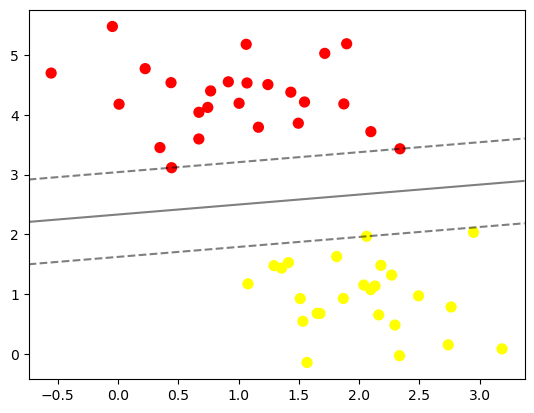

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat plot scatter dari data yang dihasilkan, dengan warna berdasarkan label cluster dan menggunakan colormap 'autumn'
plot_svc_decision_function(model)  # Memanggil fungsi untuk menampilkan fungsi keputusan SVC pada plot


In [57]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

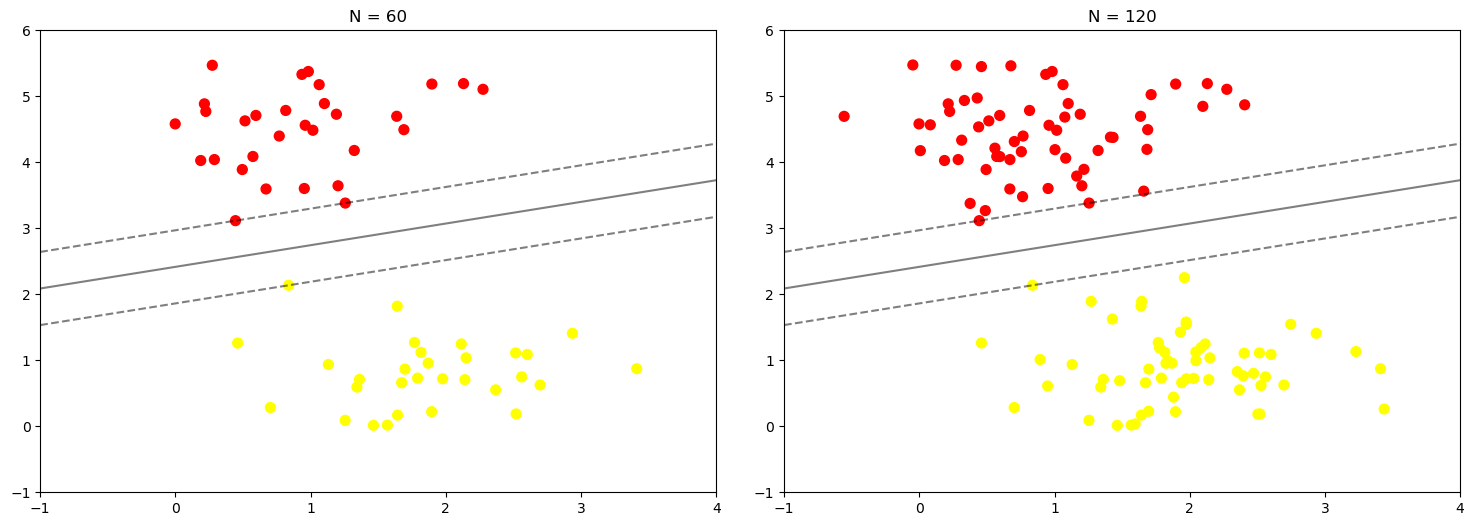

In [63]:
def plot_svm(N=10, ax=None):  # Mendefinisikan fungsi untuk menampilkan SVM dengan jumlah sampel N
    X, y = make_blobs(n_samples=200, centers=2,  # Membuat dataset dengan 200 sampel dan 2 pusat cluster
                      random_state=0, cluster_std=0.60)  # Mengatur seed random_state untuk hasil yang dapat direproduksi dan standar deviasi cluster sebesar 0.60
    X = X[:N]  # Mengambil N sampel pertama dari dataset
    y = y[:N]  # Mengambil N label pertama dari dataset
    model = SVC(kernel='linear', C=1E10)  # Membuat model SVC dengan kernel linear dan parameter regularisasi C yang sangat besar (1E10)
    model.fit(X, y)  # Melatih model SVC menggunakan data X dan label y
    
    ax = ax or plt.gca()  # Menggunakan sumbu saat ini jika ax tidak diberikan
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat plot scatter dari data yang dihasilkan, dengan warna berdasarkan label cluster dan menggunakan colormap 'autumn'
    ax.set_xlim(-1, 4)  # Mengatur batas sumbu x dari -1 hingga 4
    ax.set_ylim(-1, 6)  # Mengatur batas sumbu y dari -1 hingga 6
    plot_svc_decision_function(model, ax)  # Memanggil fungsi untuk menampilkan fungsi keputusan SVC pada plot

fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # Membuat subplot dengan 1 baris dan 2 kolom, ukuran gambar 16x6 inci
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)  # Mengatur jarak antar subplot
for axi, N in zip(ax, [60, 120]):  # Loop melalui subplot dan jumlah sampel N (60 dan 120)
    plot_svm(N, axi)  # Memanggil fungsi plot_svm untuk setiap subplot dengan jumlah sampel N
    axi.set_title('N = {0}'.format(N))  # Mengatur judul untuk setiap subplot berdasarkan jumlah sampel N


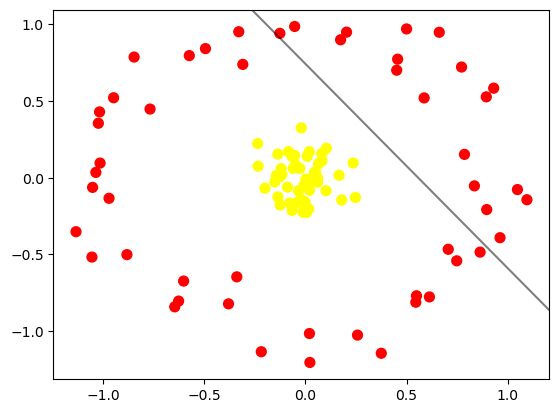

In [139]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles  # Mengimpor fungsi make_circles dari sklearn.datasets untuk membuat dataset berbentuk lingkaran
X, y = make_circles(100, factor=.1, noise=.1)  # Membuat dataset dengan 100 sampel, faktor skala 0.1 antara lingkaran dalam dan luar, dan menambahkan noise Gaussian dengan standar deviasi 0.1

clf = SVC(kernel='linear').fit(X, y)  # Membuat dan melatih model SVC dengan kernel linear menggunakan data X dan label y

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat plot scatter dari data yang dihasilkan, dengan warna berdasarkan label cluster dan menggunakan colormap 'autumn'
plot_svc_decision_function(clf, plot_support=False)  # Memanggil fungsi untuk menampilkan fungsi keputusan SVC pada plot tanpa menampilkan support vectors


In [140]:
r = np.exp(-(X ** 2).sum(1))

In [156]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-8.31330211e-02,  1.70029478e-01],
       [ 4.55480273e-01,  7.73544710e-01],
       [-2.36262781e-01,  2.22791203e-01],
       [ 9.61263125e-01, -3.91642629e-01],
       [ 2.57212619e-01, -1.02716995e+00],
       [ 6.12463052e-01, -7.78171791e-01],
       [ 5.50426187e-03, -2.26688521e-01],
       [-5.73760095e-01,  7.96693499e-01],
       [-5.33738776e-02,  1.44028907e-01],
       [ 4.96262328e-02,  3.88161497e-02],
       [-1.99948249e-01, -6.86496455e-02],
       [-3.29333366e-01,  9.52458221e-01],
       [ 6.61000065e-01,  9.49035878e-01],
       [-4.93901499e-01,  8.42416890e-01],
       [-4.85253368e-02,  8.33025837e-02],
       [-6.45631292e-01, -8.42770640e-01],
       [ 1.01697725e-01, -8.53782462e-02],
       [-1.25101121e-01,  7.18897925e-03],
       [-3.80056110e-01, -8.23303306e-01],
       [ 8.62756237e-01, -4.85843874e-01],
       [-8.84964421e-02, -6.16462883e-02],
       [-1.43412491e-01,  1.42176226e-02],
       

In [157]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

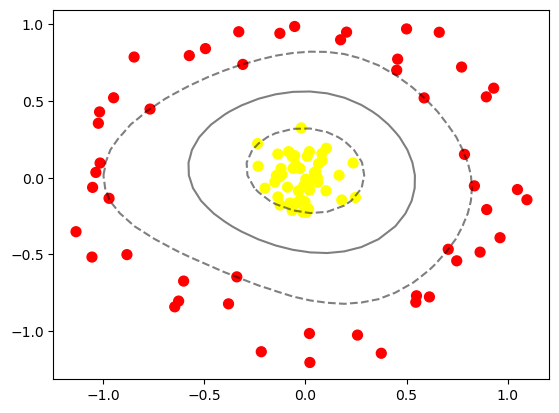

In [159]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat plot scatter dari data yang dihasilkan, dengan warna berdasarkan label cluster dan menggunakan colormap 'autumn'
plot_svc_decision_function(clf)  # Memanggil fungsi untuk menampilkan fungsi keputusan SVC pada plot
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],  # Membuat plot scatter untuk support vectors dari model SVC
            s=300, lw=1, facecolors='none')  # Mengatur ukuran titik support vectors menjadi 300, lebar garis menjadi 1, dan warna wajah menjadi transparan


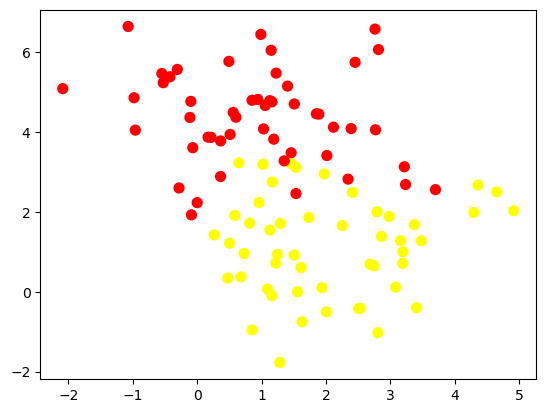

In [160]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

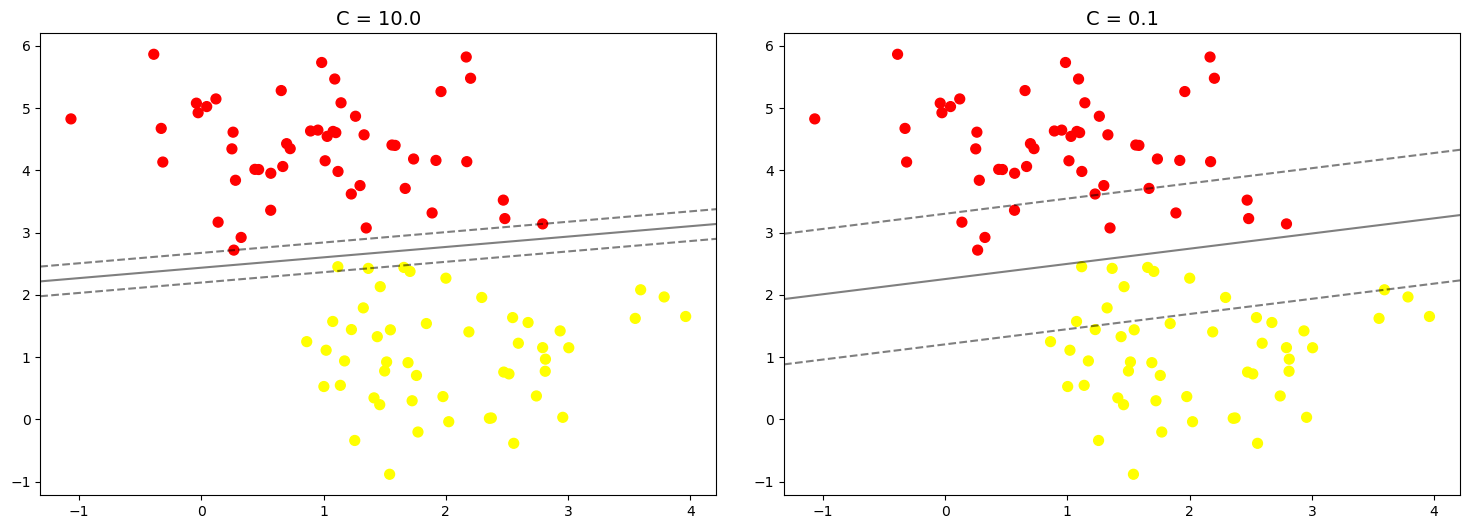

In [161]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)